In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.ticker as mticker

import warnings
warnings.filterwarnings('ignore')

In [28]:
#Upload the data

data = pd.read_csv(
    "barbecue_sauce_sales.csv",
    parse_dates=["date"],
    date_format="%m/%d/%Y"
)
print(" BBQ Sauce Sales Data Preview:")
display(data.head())

 BBQ Sauce Sales Data Preview:


,date,amount
0,03-01-2020,285
1,06-01-2020,627
2,07-01-2020,241
3,08-01-2020,356
4,09-01-2020,877


In [29]:
# 1.1 Ensure correct types
# Convert 'amount' to numeric (coerce errors to NaN)
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# 1.2 Sort by date and set index
data = data.sort_values('date')
data.set_index('date', inplace=True)

In [30]:
data["amount_lag_1"] = data["amount"].shift(1)    # yesterday
data["amount_lag_7"] = data["amount"].shift(7)    # same day last week
data["amount_lag_30"] = data["amount"].shift(30)  # same day last month


In [31]:
corr = data[["amount", "amount_lag_1", "amount_lag_7", "amount_lag_30"]].corr()
print(corr)


                 amount  amount_lag_1  amount_lag_7  amount_lag_30
amount         1.000000      0.046191     -0.027897       0.045080
amount_lag_1   0.046191      1.000000      0.043351      -0.023554
amount_lag_7  -0.027897      0.043351      1.000000       0.023830
amount_lag_30  0.045080     -0.023554      0.023830       1.000000


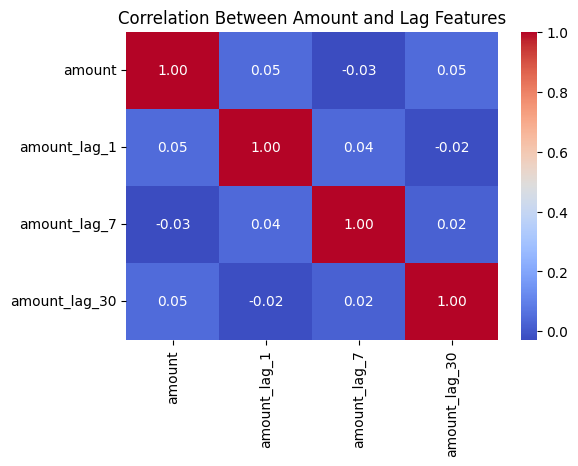

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Amount and Lag Features")
plt.show()


### Findings:

No strong autocorrelation 

Lag features won’t add much predictive value. 


In [33]:
# Create 7-day and 30-day rolling means for amount
data["amount_7d_mean"] = data["amount"].rolling(window=7).mean()
data["amount_30d_mean"] = data["amount"].rolling(window=30).mean()


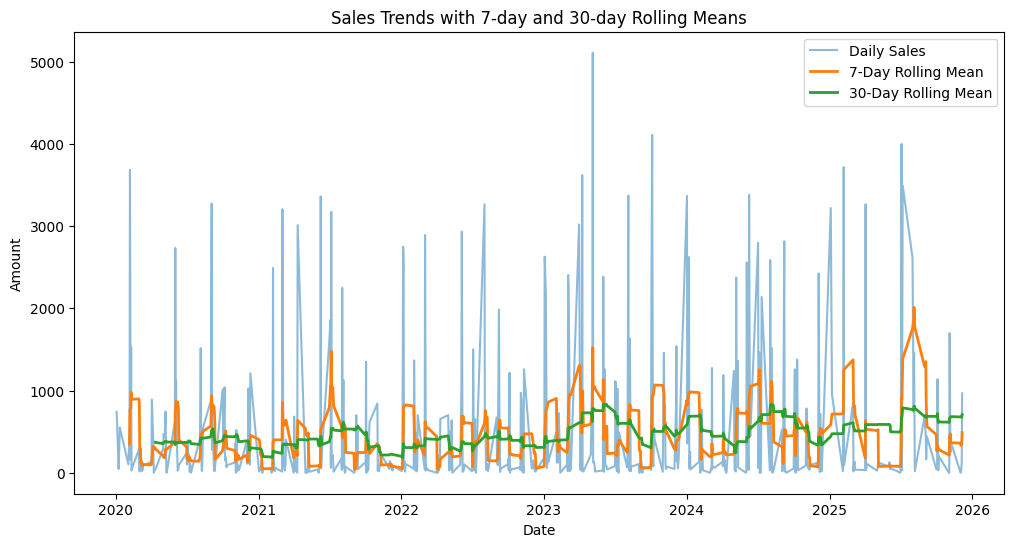

In [34]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data["amount"], label="Daily Sales", alpha=0.5)
plt.plot(data.index, data["amount_7d_mean"], label="7-Day Rolling Mean", linewidth=2)
plt.plot(data.index, data["amount_30d_mean"], label="30-Day Rolling Mean", linewidth=2)
plt.title("Sales Trends with 7-day and 30-day Rolling Means")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()



### Findings:

The daily sales (blue line) fluctuate heavily, showing sharp short-term spikes and drops.

The 7-day rolling mean (orange line) smooths weekly noise, revealing short-term variations that repeat through the years.

The 30-day rolling mean (green line) shows a stable long-term pattern, indicating that overall sales remain steady across years, with periodic rises (likely during BBQ season).

Rolling averages reveal mild seasonal cycles but no major long-term growth or decline.
Sales are highly variable day-to-day and likely influenced by short-term or event-based factors rather than consistent time trends.

### Next steps: 

***Feature Engineering***

Create additional time-based features:

month, dayofweek, is_weekend, season, quarter

Rolling statistics: 7-day and 30-day mean, std

Lag features: 1-day, 7-day, 30-day lags

Cyclical encodings for month and weekday (sin/cos)



***Modelling***

Implement and compare five forecasting models:

ARIMA → traditional time-series model for trend/seasonality

Random Forest Regressor → ensemble tree-based model

XGBoost Regressor → gradient boosting for non-linear patterns

Prophet (by Meta) → interpretable model for trend + seasonality

LSTM Neural Network → deep learning model for sequential patterns

***Forecasting & Evaluation***

Forecast future BBQ sauce sales using best-performing model.

Evaluate with metrics: RMSE, MAE, and MAPE.

Visualize actual vs predicted sales and discuss insights.